In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def E(z):
    return np.mean(z)

def cost_function(params, x, y):
    return np.sum(np.abs(y - x.dot(params)))

def pearsonr(x, y):
    return st.pearsonr(x, y)[0]

def LAV(x, y):
    X = np.asarray([np.ones(len(x)), x]).T
    x0 = np.ones(2)
    output = minimize(cost_function, x0, args = (X, y))
    y_hat = X.dot(output.x)
    
    A = (y_hat[1] - y_hat[0]) / (x[1] - x[0])
    B = np.median(-(A * x - y))

    return A, B

def RSS(x, y):
    A = (np.std(y) / np.std(x)) * pearsonr(x, y)
    return A, E(y) - A * E(x)

def discard(a, n):
    return ('{0:.' + str(n) + 'f}').format(a).rstrip('0').rstrip('.')

np.random.seed(0)

Original sample,a^,b^
RSS,1.75065,2.631271
LAD,322.00000,228.000000


Indignant sample,a^,b^
RSS,1.751878,2.631394
LAD,322.000000,228.000000


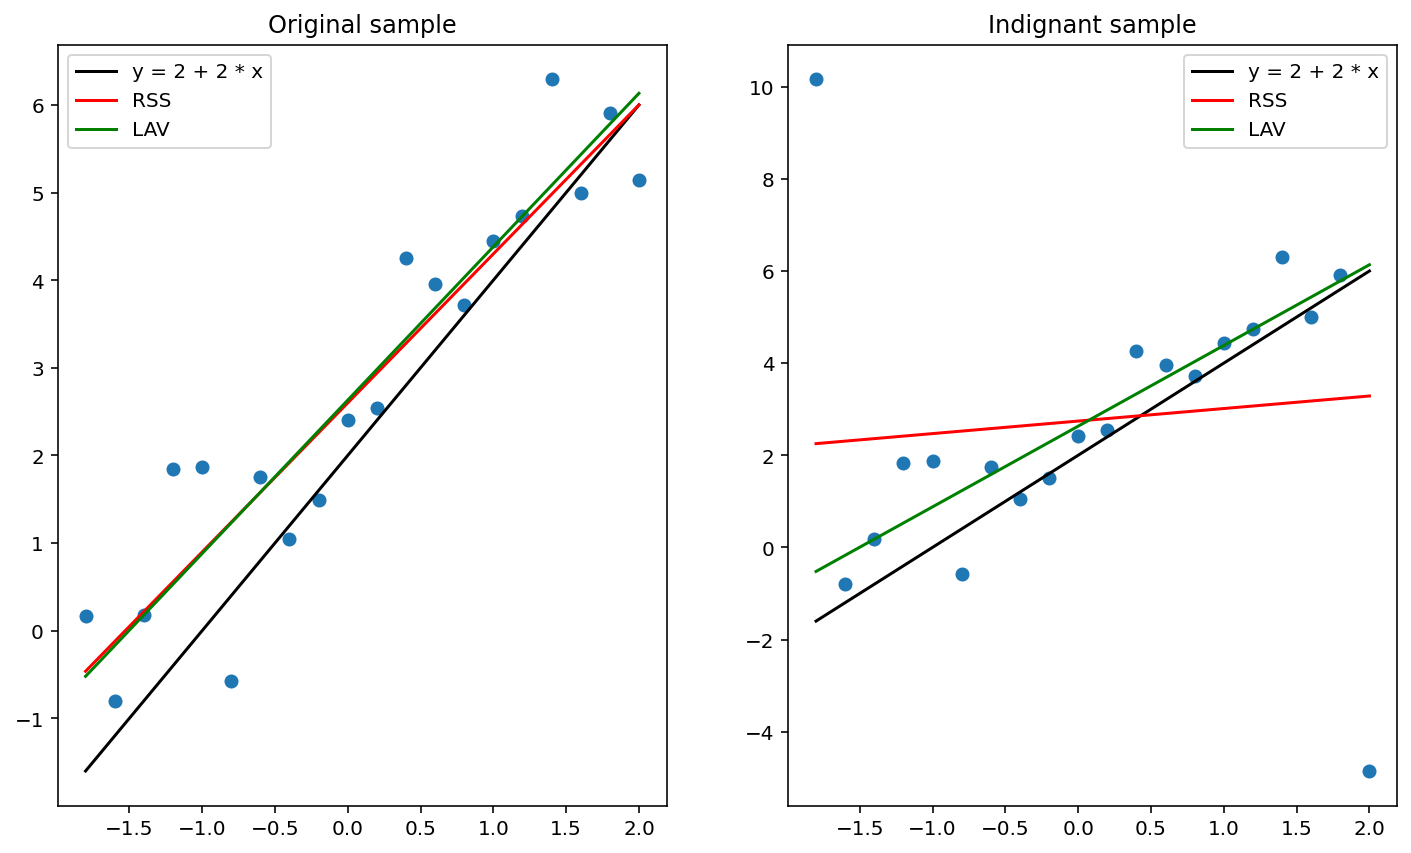

In [3]:
a, b, h = -1.8, 2.0, 0.2
n = int(discard((b - a) / h, 0)) + 1

x_i = np.linspace(a, b, n)
e_i = np.random.standard_normal(n)
y_i = 2 + 2 * x_i + e_i
orig_y_i = y_i.copy()


# без возмущений
plt.figure()
plt.subplot(121)
plt.title('Original sample')

plt.scatter(x_i, y_i)
plt.plot(x_i, orig_y_i - e_i, 'black', label = 'y = 2 + 2 * x')

A_RSS, B_RSS = RSS(x_i, y_i)
plt.plot(x_i, A_RSS * x_i + B_RSS, 'red', label = 'RSS')

A_LAV, B_LAV = LAV(x_i, y_i)
plt.plot(x_i, A_LAV * x_i + B_LAV, 'green', label = 'LAV')
plt.legend()

original_table = pd.DataFrame(
            np.array(
                [
                    [A_RSS, B_RSS],
                    [A_LAV, B_LAV]
                ],
            )
        )
original_table.columns = ['a^', 'b^']
original_table.index = ['RSS',
                        'LAD']
original_table.columns.name = 'Original sample'
display(original_table)


# с возмущениями
y_i[0] += 10
y_i[-1] += -10

plt.subplot(122)
plt.title('Indignant sample')

plt.scatter(x_i, y_i)
plt.plot(x_i, orig_y_i - e_i, 'black', label = 'y = 2 + 2 * x')

A_RSS, B_RSS = RSS(x_i, y_i)
plt.plot(x_i, A_RSS * x_i + B_RSS, 'red', label = 'RSS')

A_LAV, B_LAV = LAV(x_i, y_i)
plt.plot(x_i, A_LAV * x_i + B_LAV, 'green', label = 'LAV')
plt.legend()

indignant_table = pd.DataFrame(
            np.array(
                [
                    [A_RSS, B_RSS],
                    [A_LAV, B_LAV]
                ],
            )
        )
indignant_table.columns = ['a^', 'b^']
indignant_table.index = ['RSS',
                        'LAD']
indignant_table.columns.name = 'Indignant sample'
display(indignant_table)

plt.savefig('linear_regression.png')
plt.show()